# 4.4 과대적합(Overfitting)과 과소적합(Underfitting)


- 머신러닝의 근본적인 이슈는 **최적화와 일반화 사이의 줄다리기**
    - **최적화**
        - 가능한 **훈련 데이터에서 최고의 성능**을 얻으려고 모델을 조정하는 과정
    - **일반화(Generalization)**
        - 훈련된 모델이 **이전에 본 적 없는 데이터에서 얼마나 잘 수행되는지**를 의미
        
        
- **모델을 만드는 목적은 좋은 일반화 성능을 얻기 위한 것**이지만 일반화 성능을 제어할 방법이 없으며 단지 훈련 데이터를 기반으로 모델을 조정할 수 밖에 없음
- 따라서 **최적화를 하되 일반화가 잘 되도록 적당히 조절**하는 법을 알아야 함
- 이는 최적화 과정에서 일어나는 **과대적합으로 인한 일반화 성능 저하를 막는 것**을 뜻함

- **과소 적합(underfitting)**
    - 훈련 데이터의 손실이 낮아질수록 테스트 데이터의 손실도 낮아짐
    - 네트워크가 훈련 데이터의 특성을 모두 학습하지 못한 상태
    - **일반화 성능**이 **좋아짐**
    

- **과대 적합(overfitting)**
    - 훈련 데이터의 손실이 낮아질수록 테스트 데이터의 손실이 높아짐
    - 네트워크가 **훈련 데이터에 특화된 패턴을 학습**하기 시작
    - **일반화 성능**이 더이상 높아지지 않으며 오히려 **낮아짐**

- **Regularization**
    - **과대 적합을 피하는 처리 과정**을 **regularization(규제)**이라 함
    - **가장 좋은 방법은 더 많은 훈련데이터를 모으는 것**
        - 더 많은 데이터에서 훈련된 모델은 일반화 성능이 더욱 뛰어남
    - **데이터를 더 모을 수 없을 경우**의 차선책은 **모델이 수용할 수 있는 정보의 양을 조절하거나 저장할 수 있는 정보에 제약**을 가하는 것
        - 네트워크가 **적은 수의 패턴만 기억할 수 있다면** 최적화 과정에서 **가장 중요한 패턴에 집중**하게 됨

### 4.4.1 네트워크 크기 축소

- 과대적합을 막는 가장 단순한 방법은 **네트워크의 크기(학습 파라미터의 수)를 줄이는 것**
    - 파라미터의 수는 **층의 수**, 각 **층의 유닛의 수**를 뜻함


- **네트워크의 학습 파라미터 수**는 네트워크가 **학습할 수 있는 용량(capacity)**을 뜻하며 **용량을 제한**한다면 많은 양을 학습해 **overfitting되는 것을 제한**할 수 있음
- 따라서 **너무 많은 용량과 충분하지 않은 용량 사이의 절충점**을 찾아야 함(데이터에 **알맞은 네트워크의 크기**를 찾는 것)


- 일반적인 방법은 비교적 적은 수의 층과 파라미터에서 시작해 validation loss가 감소되기 시작할 때 까지 층이나 유닛의 수를 늘리는 것

In [1]:
# 네트워크의 크기에 따른 Overfitting (영화 리뷰 데이터 셋으로 비교)

from keras.datasets import imdb

# IMDB 데이터셋 로드
# num_words=10000은 자주 사용하는 단어 1만개만 사용한다는 의미
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

Using TensorFlow backend.


In [2]:
import numpy as np

def vectorization(sequences, words=10000):
    result = np.zeros((len(sequences), words))
    
    for idx, sequence in enumerate(sequences):
        result[idx, sequence] = 1.
    
    return result


train_data = vectorization(train_data)
test_data = vectorization(test_data)
print(train_data.shape, test_data.shape)

val_data = train_data[:10000]
val_labels = train_labels[:10000]

train_data = train_data[10000:]
train_labels = train_labels[10000:]

(25000, 10000) (25000, 10000)


In [3]:
from keras import models
from keras import layers

model_origin = models.Sequential()
model_origin.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_origin.add(layers.Dense(16, activation='relu'))
model_origin.add(layers.Dense(1, activation='sigmoid'))

model_origin.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

hist_origin = model_origin.fit(train_data, train_labels, 
                               epochs=20, 
                               batch_size=512,
                               validation_data=(val_data, val_labels),
                               verbose=False)

In [4]:
model_small = models.Sequential()
model_small.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
model_small.add(layers.Dense(6, activation='relu'))
model_small.add(layers.Dense(1, activation='sigmoid'))

model_small.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

hist_small = model_small.fit(train_data, train_labels, 
                             epochs=20, 
                             batch_size=512, 
                             validation_data=(val_data, val_labels),
                             verbose=False)

In [5]:
model_origin = models.Sequential()
model_origin.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_origin.add(layers.Dense(16, activation='relu'))
model_origin.add(layers.Dense(1, activation='sigmoid'))

model_origin.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

hist_origin = model_origin.fit(train_data, train_labels, 
                               epochs=20, 
                               batch_size=512,
                               validation_data=(val_data, val_labels),
                               verbose=False)

In [6]:
model_big = models.Sequential()
model_big.add(layers.Dense(1024, activation='relu', input_shape=(10000,)))
model_big.add(layers.Dense(1024, activation='relu'))
model_big.add(layers.Dense(1, activation='sigmoid'))

model_big.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

hist_big = model_big.fit(train_data, train_labels, 
                               epochs=20, 
                               batch_size=512,
                               validation_data=(val_data, val_labels),
                               verbose=False)

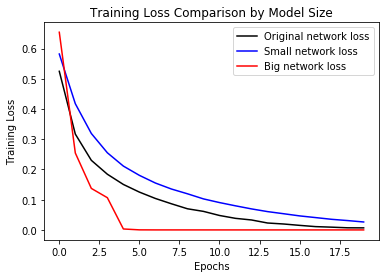

In [7]:
import matplotlib.pyplot as plt

loss_origin = hist_origin.history['loss']
loss_small = hist_small.history['loss']
loss_big = hist_big.history['loss']

plt.plot(loss_origin, 'k-', label='Original network loss')
plt.plot(loss_small, 'b-', label='Small network loss')
plt.plot(loss_big, 'r-', label='Big network loss')
plt.title("Training Loss Comparison by Model Size")
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.legend(loc='best')

plt.show()

**결과 분석**
- 큰 네트워크
    - Training Loss가 0에 가까워지는 속도가 빠름
    - 빠르게 훈련 데이터를 모델링 할 수 있음
    - **가장 Overfitting에 민감함**
    
    
- 작은 네트워크
    - Training Loss가 0에 가까워지는 속도가 느림
    - 빠르게 훈련 데이터를 모델링 할 수 없음
    - **가장 Overfitting에 둔감함**

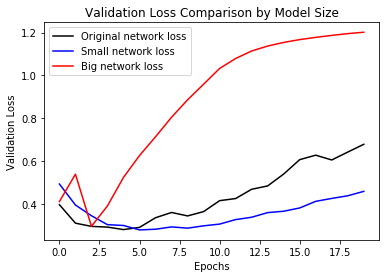

In [8]:
loss_origin = hist_origin.history['val_loss']
loss_small = hist_small.history['val_loss']
loss_big = hist_big.history['val_loss']

plt.plot(loss_origin, 'k-', label='Original network loss')
plt.plot(loss_small, 'b-', label='Small network loss')
plt.plot(loss_big, 'r-', label='Big network loss')
plt.title("Validation Loss Comparison by Model Size")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend(loc='best')

plt.show()

**결과 분석**
- 큰 네트워크
    - Validation loss의 최저점에 제일 빨리 도달(제일 빨리 Overfitting 됨)
    - Overfitting 이후 성능 감소의 폭이 가장 큼
    - **가장 Overfitting에 민감함**
    
    
- 작은 네트워크
    - Validation loss의 최저점에 제일 느리게 도달(제일 느리게 Overfitting 됨)
    - Overfitting 이후 성능 감소의 폭이 가장 작음
    - **가장 Overfitting에 둔감함**

### 4.4.2 가중치 규제 (Weight Regularization) 추가

- **단순한 네트워크**가 복잡한 네트워크보다 **Overfitting될 가능성이 더 낮음**
    - 단순한 네트워크 모델이란?
        - 적은 수의 파라미터를 가진 모델(4.4.1절에서 한 내용)
        - **파라미터 값 분포의 엔트로피가 작은 모델**
    
    
- Weight Regularization
    - 네트워크의 복잡도에 제한을 두어 가중치가 작은 값을 가지도록 강제하는 것(단순한 네트워크로 만드는 것)
    - Norm에 기반한 방법을 사용함
    - **L1 Regularization**
        - **가중치의 절댓값**에 비례하는 비용(penalty)이 손실함수에 추가됨 (가중치의 L1 Norm)
        - $\mathcal{l1}$ penalty = $\mathcal{l1}\sum_{i=0}^n |x_i|$
        
    - **L2 Regularization**
        - **가중치의 제곱**에 비례하는 비용(penalty)이 손실함수에 추가됨 (가중치의 L2 Norm, 정확히는 L2 Norm의 제곱)
        - $\mathcal{l2}$ penalty = $\mathcal{l2}\sum_{i=0}^n x_i^2$
     - 위의 penalty 항은 training시에만 손실함수에 추가됨
     
- Norm
    - Norm은 벡터의 길이 혹은 크기를 측정하는 방법
    - Norm이 측정한 벡터의 크기는 원점에서 벡터 좌표까지의 거리 혹은 Magnitude라고 함
    - $L_p = (\sum^n_i |x_i|^p)^{1/p}$
    
    - **L1 Norm**
        - p가 1인 Norm
        - $L_1 = (\sum^n_i |x_i|)$
    - **L2 Norm**
        - p가 2인 Norm
        - $L_2 = (\sum^n_i |x_i|^2)^{1/2}$

In [9]:
# 모델에 weight regularization 추가
# 여기서는 L2 regularization을 적용해봄

# regularization 함수들
# l1() : L1 regularization
# l2() : L2 regularization
# l1_l2() : L1, L2 regularization 병행

from keras import regularizers

l2_model = models.Sequential()
# l2(0.001)는 가중치의 L2 Norm의 제곱 값에 0.001을 곱해서 전체 loss에 더해진다는 의미
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                       activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                       activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

l2_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

hist_l2 = l2_model.fit(train_data, train_labels, 
                               epochs=20, 
                               batch_size=512,
                               validation_data=(val_data, val_labels),
                               verbose=False)

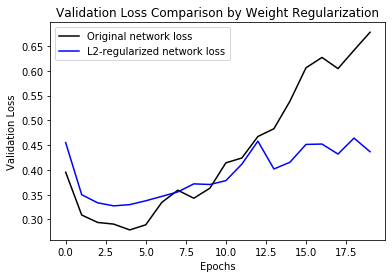

In [10]:
loss_origin = hist_origin.history['val_loss']
loss_l2 = hist_l2.history['val_loss']

plt.plot(loss_origin, 'k-', label='Original network loss')
plt.plot(loss_l2, 'b-', label='L2-regularized network loss')
plt.title("Validation Loss Comparison by Weight Regularization")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend(loc='best')

plt.show()

**결과 분석**
- L2 Regularization을 적용한 모델은 Overfitting에 견디는 모습을 보여줌

### 4.4.3 Dropout 추가

- Dropout
    - 훈련 중에 **무작위로 층의 일부 출력을 제외**시키는 방법(0으로 만듦)
    - 가장 효과적이고 널리 사용되는 Regularization 방법 중 하나
    - Dropout 비율은 0이 될 특성의 비율을 뜻하며 보통 0.2~0.5를 사용
    - Keras에서는 층의 출력 바로 뒤에 Dropout층을 추가하는 방식으로 Dropout을 적용할 수 있음
    
    
- Dropout의 원리 (참고)
    - Dropout은 토론토 대학의 제프리 힌튼과 그의 학생들이 개발함
    - 힌튼은 은행에서 사용하는 부정 방지 메커니즘에서 아이디어를 얻었다고 함
        - 부정방지 메커니즘
            - 직원들 사이의 유대를 막기 위해 은행원들의 업무가 계속 해서 바뀌는 것
            - 직원들간의 유대가 커지면 부정행위가 일어난다고 보았음
    - 각 샘플에 대해 뉴런의 일부를 무작위하게 제거하면 뉴런의 부정한 협업을 방지하고 Overfitting을 방지하게됨
    - 즉, **층의 출력 값에 노이즈를 추가해 중요하지 않은 우연한 패턴(힌튼이 이야기한 부정한 협업)을 깨뜨리는 것**

In [11]:
dropout_model = models.Sequential()
dropout_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dropout_model.add(layers.Dropout(0.5))
dropout_model.add(layers.Dense(16, activation='relu'))
dropout_model.add(layers.Dropout(0.5))
dropout_model.add(layers.Dense(1, activation='sigmoid'))

dropout_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

hist_dropout = dropout_model.fit(train_data, train_labels, 
                                 epochs=20, 
                                 batch_size=512,
                                 validation_data=(val_data, val_labels),
                                 verbose=False)

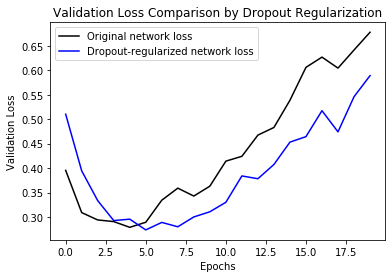

In [12]:
loss_origin = hist_origin.history['val_loss']
loss_dropout = hist_dropout.history['val_loss']

plt.plot(loss_origin, 'k-', label='Original network loss')
plt.plot(loss_dropout, 'b-', label='Dropout-regularized network loss')
plt.title("Validation Loss Comparison by Dropout Regularization")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend(loc='best')

plt.show()

**결과 분석**
- Dropout을 적용한 모델이 Overfitting에 견디는 모습을 보여줌

**정리 : 신경망에서 Overfitting을 방지하기 위해 널리 사용되는 방법**
- **훈련 데이터를 더 모은다**
- **네트워크의 용량(크기)를 감소시킨다**
- **Weight Regularization을 추가한다**
- **Dropout을 추가한다**